In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# train and  test datasets load
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
#number of samples
print(len(x_train),len(x_test))

60000 10000


In [5]:
#each sample of 28*28 pixels in 2D array
x_train[0].shape

(28, 28)

In [6]:
28*28

784

In [7]:
#scaling the data to improve accuracy
x_train=x_train/255
x_test=x_test/255
#accuracy increased from 86 to 92%

5


<Figure size 640x480 with 0 Axes>

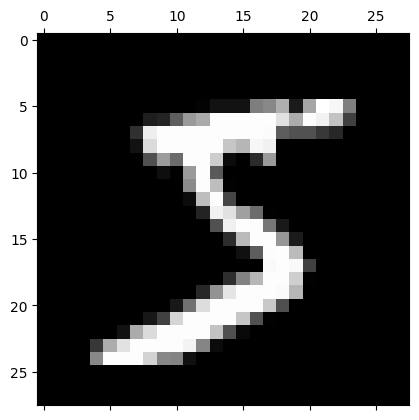

In [8]:
plt.gray()
plt.matshow(x_train[0])
# Display an array as a matrix in a new figure window.
print(y_train[0])

In [9]:
# flatten the 2D array into 1D array to form the first layer of newural network
# passing reshape(60000,784)
flattened_x_train = x_train.reshape(len(x_train),28*28)
flattened_x_test = x_test.reshape(len(x_test),28*28)
flattened_x_train.shape,flattened_x_test.shape

((60000, 784), (10000, 784))

In [10]:
# Creating a Neural Network with 784 as first(input) layer and 10 digits as last(output) layer
# `Sequential` groups a linear stack of layers into a `tf.keras.model`.
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(784,)))   #input layer
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))  #output layer
#compile it
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(flattened_x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4705 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2671 - accuracy: 0.9255


In [11]:
model.evaluate(flattened_x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.9266


[0.26660001277923584, 0.9265999794006348]

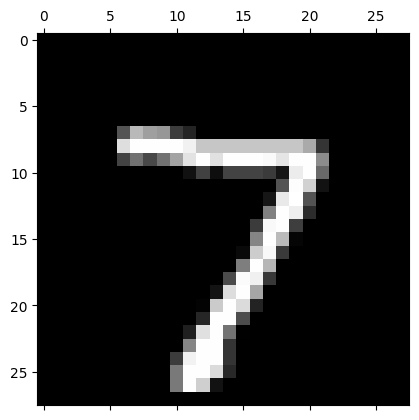

In [12]:
plt.matshow(x_test[0])

In [13]:
y_predicted = model.predict(flattened_x_test)
y_predicted[0]

313/313 [==============================] - 0s 864us/step


array([1.9859083e-02, 2.9053814e-07, 3.8178701e-02, 9.5134854e-01,
       2.8044216e-03, 1.0480963e-01, 1.3384702e-06, 9.9975604e-01,
       1.0670000e-01, 6.4714998e-01], dtype=float32)

In [14]:
np.argmax(y_predicted[0])

7

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)


Text(95.72222222222221, 0.5, 'Truth')

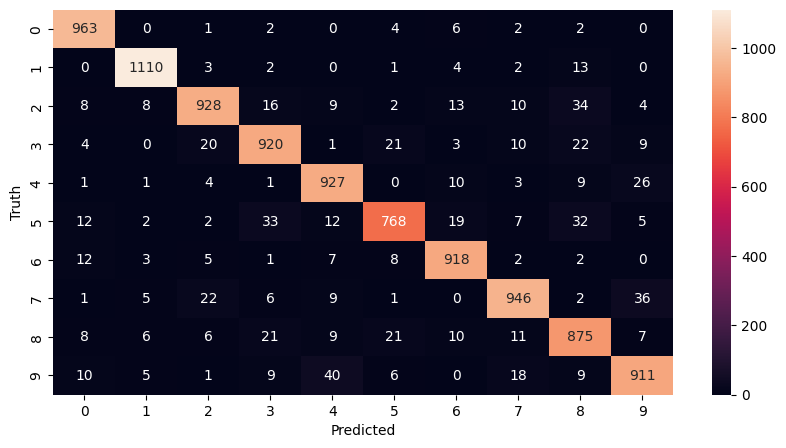

In [28]:
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
#MODEL WITH HIDDEN LAYERS
model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(784,)))   #input layer
model2.add(tf.keras.layers.Dense(100,activation='relu')) #hidden layer
model2.add(tf.keras.layers.Dense(10,activation='sigmoid'))  #output layer
#compile it
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.fit(flattened_x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2762 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1230 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0858 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0654 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0508 - accuracy: 0.9845


In [18]:
model2.evaluate(flattened_x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9770


[0.07726317644119263, 0.9769999980926514]

Text(95.72222222222221, 0.5, 'Truth')

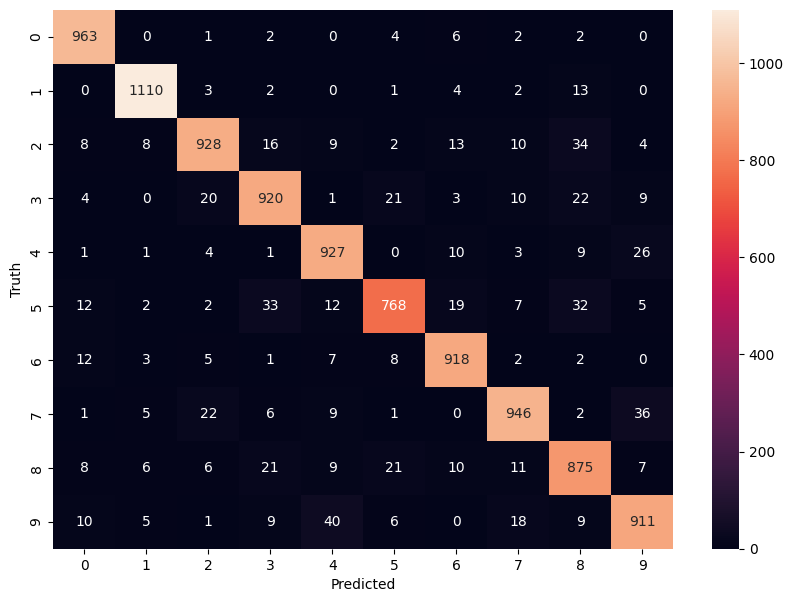

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
#MODEL WITH HIDDEN LAYERS
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model2.add(tf.keras.Input(shape=(784,)))
model2.add(tf.keras.layers.Dense(100,activation='relu')) #hidden layer
model2.add(tf.keras.layers.Dense(10,activation='sigmoid'))  #output layer
#compile it
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2794 - accuracy: 0.9199
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1271 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0887 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0681 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0537 - accuracy: 0.9833


313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

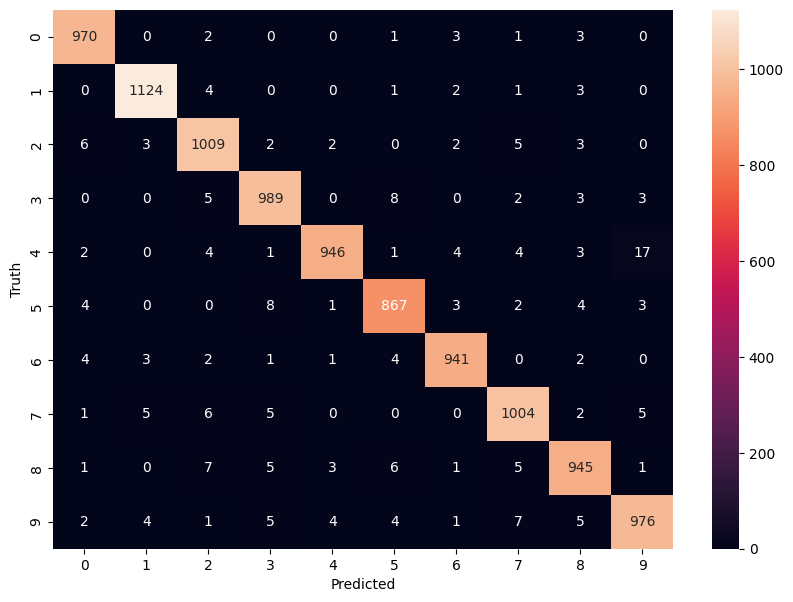

In [34]:
y_predicted2 = model2.predict(x_test)
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]
cm2 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels2)
plt.figure(figsize=(10,7))
sn.heatmap(cm2,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')